# <div style="text-align:center">"Handout: Particle in a Box"</div>

## <span style="color:blue">1. Theoretical Background</span>

### 1.1. Introduction

This is a body of section 1.1. You can write your text here, insert equations, figures, etc.

### Erwin Schrödinger (1887-1961)

![alt text](https://live.staticflickr.com/7402/9272942273_7c743e465b_b.jpg "")


Schrödinger attended graduate school at the University of Vienna, where in the year 1910 he obtained a Ph.D in theoretical physics. Later in 1927, Max Planck (the guy known for Planks Constant) specifically sought out Schrödinger to take over his position at the University of Berlin. However, 6 years later Hitler came to town and Schrödinger left Berlin to avoid Hitler and moved to Austria to work at the University of Graz. Sadly, Hitler 3 years after Berlin, decided to invaded Austria and as a result Schrödinger had to renounce his faculty position. But nonetheless, Schrödinger was a wanted man for his knowledge and moved to a University in Dublin, Ireland which became his last move for Universities.

Notable Award:
	-Nobel laureate in physics alongside Dirac for their work in “discovery of new productive forms of Atomic Theory.”

### Theoretical Background 

1-Dimensional wave equation

$\frac{\partial^2 u}{\partial x^2} = \frac{1}{v^2}\frac{\partial^2 u}{\partial t^2}$


u can be expressed as:

$u\left (x,t  \right )= \psi \left ( x \right )\cos \left ( \omega t \right )$



### 1.2. Energy spectrum of PIB

The energy of a particle in a 1D box is expressed as :
$E_{n} = \frac{n^{2}h^{2}}{2mL^{2}}$
, where n is the quantum number with a domain of all nature numbers, h is the Plank constant, m is the mass of particle, and L is the length of the box. 

Here we have an idea that energy is quantized in quantum mechnics, which indicates the energy is no long continuous, and it would have a minimal "unit energy". 

In this specific case, the unit energy would be $E_1 = \frac{h^{2}}{2mL^{2}}$, which is also called as the ground state energy, and the state with ground state energy would be the ground state. With the given ground state energy, we could express energy of allowed eigenstate in the form of $E_n = n^{2}\times E_1$, and those state with quantum number n greater than 1 would be known as the n-1 th excited state. 

Due to the fact that the energy of states are propotional to $n^2$, the energy gap between two adjcent energy level can be expressed as $E_n - E_{n-1} = (2n -1)E_1$.

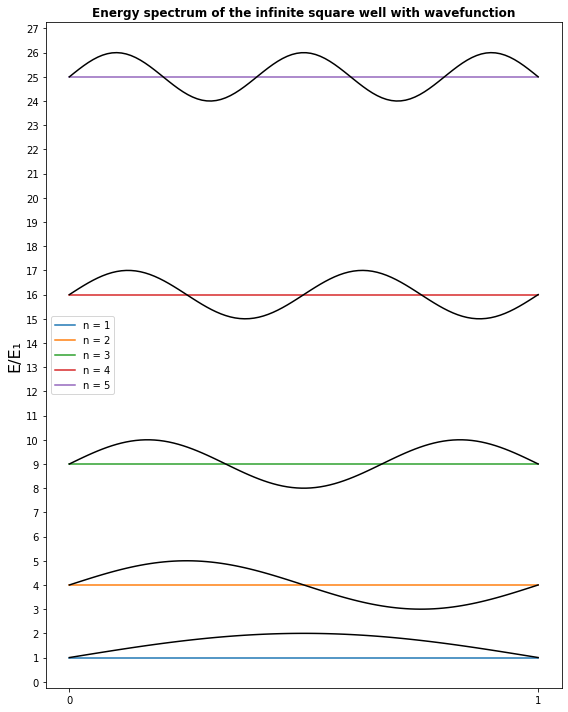

In [1]:
#Import Python modules
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

#Add title to the graph
fig,ax = plt.subplots(figsize=(8, 10), tight_layout=True)

#define x_points
L = 1
n_points = 100
x_points = np.linspace(0, L, n_points)
gd = np.ones(n_points)

#Plot energies
for i in range(5):
    ax.plot(x_points, (i+1)**2 * gd, label = 'n = ' + str(i+1))
    ax.plot(x_points, (np.sin((i+1)*np.pi*x_points/L)+(i+1)**2), color = 'k')
    
ax.set_xticks([0, L])
ax.set_yticks(np.arange(28))
ax.set_ylabel('E/E\N{SUBSCRIPT ONE}', fontsize = 16)
ax.set_title('Energy spectrum of the infinite square well with wavefunction', fontsize=12, fontweight= 'bold')

plt.legend()
plt.show()




### 1.3. PIB wavefunctions

#### Background

The wavefunctions that are solutions for the 1D Particle in a Box have the form

\begin{equation}\label{eq:pib_wfn}
\Psi_n (x) = B \sin{\frac{n \pi x}{L}}
\ \ \ \ \ \ \ \ \ \
n = 1, 2, 3, \cdots
\end{equation}

in which B is the \textit{normalization constant} that ensures the probability of finding the particle in the region $0 \leq x \leq L$ is equal to 1.

\begin{equation}\label{eq:normal}
\int_0^L \Psi_n^{*} (x) \Psi_n(x) dx = 1
\ \ \ \ \ \ \
\end{equation}

Recall that this is the boundary condition that is imposed on the potential energy operator $V(x)$ in the 1D Hamiltonian operator $\hat{H} = \hat{K}_x + V(x)$. 

\[
V(x)=
\begin{cases} 
0    & 0 \leq x \leq L \\
\infty & x < 0, x > L 
\end{cases}
\]

We can solve for B by inserting Eq. \ref{eq:pib_wfn} into Eq. \ref{eq:normal}. With some calculus, we arrive at the solution $B = \sqrt{\frac{2}{a}}$ that allows us to write the \textit{normalized} wavefunction

\begin{equation}\label{eq:norm_pib_wfn}
\Psi_n (x) = \sqrt{\frac{2}{L}} \sin{\frac{n \pi x}{L}}
\ \ \ \ \ \ \ \ \ \
n = 1, 2, 3, \cdots
\end{equation}

#### Example 1. Plot the PIB wavefunction for the quantum number $n$ and box dimension $L$.

First, let's define a function that calculates the wavefunction of PIB for a specified box dimension L and quantum number n:

In [ ]:
# Use comments in your code cells to make the code more readible
# Make sure your code is clean and variables have readable names

# Import Python modules
import matplotlib.pyplot as plt
import numpy as np

# Define function to calculate PIB wavefunction for a specified box dimension L, quantum number n, and position x
def pib_wfn(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

Let's define parameters of our PIB model:

In [ ]:
n = 100          # PIB quantum number
L = 10         # PIB dimension
n_points = 100 # number of points used for the plot

Now, let's plot the wavefunction:

In [ ]:
# Make sure that n is integer and n > 0
n = int(n)
if n < 1:
    raise Exception ("Quantum number n should be greater than 0")

# Define x points
x_points = np.linspace(0,L,n_points)

# Evaluate wavefunction at each x
wfn_values = pib_wfn(n, L, x_points)

# Set up graph and plot
plt.figure(figsize=(7,3))
plt.plot(x_points, wfn_values)
plt.xlabel("L", fontsize=20)
plt.ylabel("Ψ", fontsize=20)
plt.title("n="+str(n), fontsize=16)
plt.tight_layout()
plt.grid()


Now, go back and try choosing different values of $n$! What happens to the wavefunction as $n \rightarrow \infty$? You should it becoming increasing more oscillatory with increasing $n$. The \textbf{\textit{Correspondence Principle}} states that the QM results converge to those predicted by classical mechanics as $n \rightarrow \infty$.

### 1.4 Average position and momentum of PIB 

### 1.5 Particle in a finite box

Particle in the box is a generic model in quantum mechnics, and it give a basic idea that the Hamiltonian can be expressed as $\hat{H} = \hat{K}_x + V(x)$, where the $\hat{K}_x$ is the kinetic operator, and V(x) represents the potential energy in the system, and in our pervious examples, the potential within the box is zero otherwise, it would be infinite. The origin of potential is upon our choice, in order to apply symmetricity, in this case the center of the box is defined as the origin, and the potential can be expressed symbolically as:  <br />  \begin{equation} V(x)=
\begin{cases} 
\infty & x \leq -\frac{L}{2} \\
0    & -\frac{L}{2} < x \leq \frac{L}{2} \\
\infty & x > \frac{L}{2} 
\end{cases}
\end{equation}

In [ ]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Now specify the length of box

In [12]:
#input the length of box
L = 10

With the given length, the potential of infinite square well would be: 

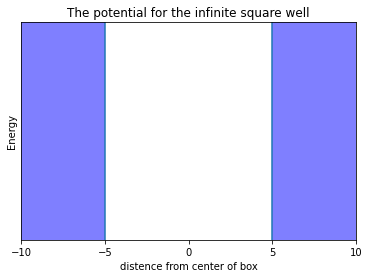

In [34]:
a = L * .5
n_points = 100
fig, ax = plt.subplots()
ax.axvline(-a, 0, 10,)
ax.axvline(a, 0, 10,)
ax.set_xticks([-L, -L/2, 0, L/2, L])
ax.set_yticks([])
ax.set_ylim(0,1)
ax.set_xlim(-L,L)
ax.set_xlabel('distence from center of box')
ax.set_ylabel('Energy')
ax.set_title('The potential for the infinite square well')
y_points_bot = np.zeros(n_points)
y_points_top = np.ones(n_points)
x_points_left = np.linspace(-L,-L/2,n_points)
x_points_right = - x_points_left
ax.fill_between(x_points_left, y_points_top, y_points_bot, facecolor = 'blue', alpha = .5)
ax.fill_between(x_points_right, y_points_top, y_points_bot, facecolor = 'blue', alpha = .5)

The shadow area indicates infinte potential, and they are called as forbidden region, and the white area is the allowed region, and in the case of infinite square well, the wavefunction is nonzero if and only if it is in the allowed region.

The infinite square well is an easy model. However, in our daily life, an infinite potential is almost impossible. Thus, the application of our crude model onto some realistic situation is important for a chemistry student. Here, we would introduce the finite square well. Similar to our previous case, the potential in our box is zero, but when x is outside the box, there would be a finite potential. Here we can express our new potential symbolically and graphically: <br />  \begin{equation} V(x)=
\begin{cases} 
V_0 & x \leq -\frac{L}{2} \\
0    & -\frac{L}{2} < x \leq \frac{L}{2} \\
V_0 & x > \frac{L}{2} 
\end{cases}
\end{equation} 




Now specify the length of box and the finite potential

In [26]:
#input the length of box
L = 10
V = 10

With the given length and potential, the finite well would look like

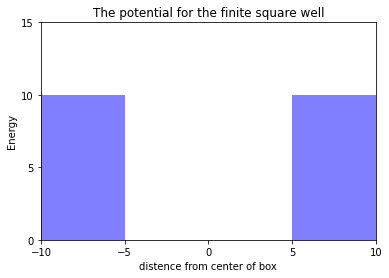

In [33]:
a = L * .5
n_points = 100
fig, ax = plt.subplots()

ax.axhline(V, -2*a, -a)
ax.axhline(V, a, 2*a)
ax.set_xticks([-L, -L/2, 0, L/2, L])
ax.set_yticks([0, 0.5*V, V, 1.5*V])
ax.set_ylim(0,1.5*V)
ax.set_xlim(-L,L)
ax.set_xlabel('distence from center of box')
ax.set_ylabel('Energy')
ax.set_title('The potential for the finite square well')
y_points_bot = np.zeros(n_points)
y_points_top = np.ones(n_points)*V
x_points_left = np.linspace(-L,-L/2,n_points)
x_points_right = - x_points_left
ax.fill_between(x_points_left, y_points_top, y_points_bot, facecolor = 'blue', alpha = .5)
ax.fill_between(x_points_right, y_points_top, y_points_bot, facecolor = 'blue', alpha = .5)

The potential well can be visualized as following, the wavefunction in the box was still in the form of trig function. However, there would still be wavefunction outside the box, that is <strong> even outside the box, you can still observe your particle </strong>. 
    
In fact, for all wavefunction with finite potential, besides the continuity of itself, its first derivative would also be continuous. If we named regions in the previous graph as region 1 (x less than $-\frac{L}{2}$), region 2 (in the box), and region 3 (x larger than $\frac{L}{2}$), the wavefunction and its first derivative at boundary points can be obtained with both region that boundary point defines.
    
Based on the relative magnitude of kinetic energy(The energy in the box) and the potential energy, there would be two different behaviors of wavefunction. If the kinetic energy is larger than the potential energy, there would be no forbidden region, and the wavefunction would be trig function everwhere. On the other hand, if the kinetic energy is smaller than the potential energy, then the blue region would be the forbidden region, and in our classical model, particles can never beyond that barrier. In our quantum particle in the box model, the wavefunction in the forbidden region would decay exponentially, and if the energy barrier disappear somewhere, the wavefunction would back to trig function and oscillate between two values, and this phenomenon is known as tunneling

## <span style="color:blue">2. Exercises</span>

### 2.1. Exercise 1. 